In [ ]:
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
from sklearn.datasets import load_boston

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [ ]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import roc_curve,plot_roc_curve, balanced_accuracy_score

In [ ]:
X,y = load_boston(return_X_y=True)


y = (y > y.mean()).astype(int)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
model = make_pipeline(StandardScaler(),LogisticRegression())

In [ ]:
model.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('logisticregression',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

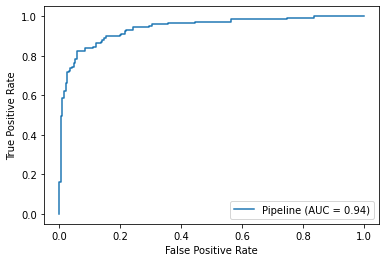

In [ ]:
plot_roc_curve(model,X_train,y_train)

In [ ]:
threshold = []
accuracy = []

for p in np.unique(model.predict_proba(X_train)[:,1]):
  threshold.append(p)
  y_pred = (model.predict_proba(X_train)[:,1] >= p).astype(int)
  accuracy.append(balanced_accuracy_score(y_train,y_pred))

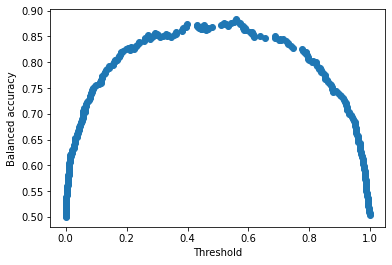

In [ ]:
plt.scatter(threshold,accuracy)
plt.xlabel("Threshold")
plt.ylabel("Balanced accuracy")
plt.show()

In [ ]:
threshold[np.argmax(accuracy)]

0.5602892029098923

In [ ]:
fpr, tpr, thresholds = roc_curve(y_train,model.predict_proba(X_train)[:,1],drop_intermediate=False)

In [ ]:
np.argmin(np.abs(fpr+tpr-1))

154

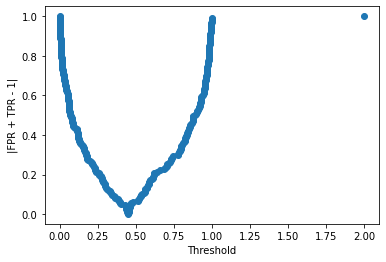

In [ ]:
plt.scatter(thresholds,np.abs(fpr+tpr-1))
plt.xlabel("Threshold")
plt.ylabel("|FPR + TPR - 1|")
plt.show()

In [ ]:
thresholds[np.argmin(np.abs(fpr+tpr-1))]

0.44625685602433796